In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#CSVs
df_ipsec = pd.read_csv('/content/drive/MyDrive/FACULDADE/Semestre 2023.2/Análise e desempenho em redes de computadores/Datasets/ipsec.csv')
df_tls = pd.read_csv('/content/drive/MyDrive/FACULDADE/Semestre 2023.2/Análise e desempenho em redes de computadores/Datasets/tls.csv')
df_normal = pd.read_csv('/content/drive/MyDrive/FACULDADE/Semestre 2023.2/Análise e desempenho em redes de computadores/Datasets/normal.csv')

# Métricas.

In [ ]:
# 1. Taxa de Transferência Efetiva.
# 2. Taxa de Bits.
# 3. Perda de Pacotes de Túnel.
# 4. Taxa de Erros e Retransmissões
# 5. Variação na Taxa de Transferência e Taxa de Bits
# 7. Variações na Congestion Window

# Taxa de Transferência Efetiva.

IPsec


In [ ]:
tranferenciaTotalIpsec = df_ipsec['Transfer(MB)'].sum()
tempoTotal = 240
taxaTransferenciaEfetivaIpsec = round((tranferenciaTotalIpsec / tempoTotal) * 8, 2)
print(f"Taxa de Transferência Efetiva Média do túnel IPsec:{round(taxaTransferenciaEfetivaIpsec,2)}Mbps")

Taxa de Transferência Efetiva Média do túnel IPsec:11.23Mbps


TLS

In [ ]:
tranferenciaTotalTls = df_tls['Transfer(MB)'].sum()
tempoTotal = 240
taxaTransferenciaEfetivaTls = round((tranferenciaTotalTls / tempoTotal) * 8, 2)
print(f"Taxa de Transferência Efetiva Média do túnel TLS:{round(taxaTransferenciaEfetivaTls,2)}Mbps")


Taxa de Transferência Efetiva Média do túnel TLS:10.31Mbps


Gráficos

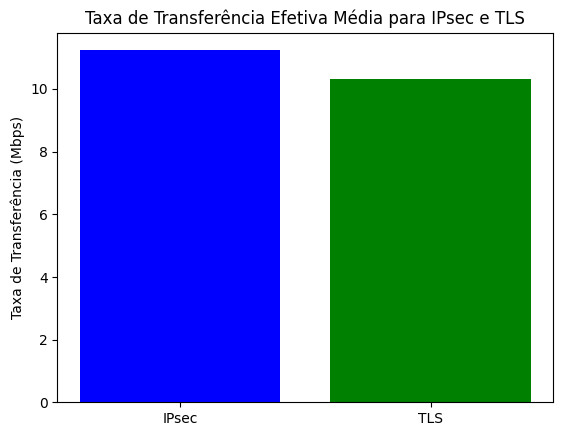

In [ ]:
taxas_transferencia = [taxaTransferenciaEfetivaIpsec, taxaTransferenciaEfetivaTls]
protocolos = ['IPsec', 'TLS']

plt.bar(protocolos, taxas_transferencia, color=['blue', 'green'])
plt.title('Taxa de Transferência Efetiva Média para IPsec e TLS')
plt.ylabel('Taxa de Transferência (Mbps)')
plt.show()

# Taxa de Bits.

IPsec

In [ ]:
taxaBitsIpsec = round(df_ipsec['Bitrate(MB)'].mean(), 2)
print(f"IPsec: {round(taxaBitsIpsec,2)}MB/s")

IPsec: 1.4MB/s


TLS

In [ ]:
taxaBitsTls = round(df_tls['Bitrate(MB)'].mean(), 2)
print(f"TLS: {round(taxaBitsTls,2)}MB/s")

TLS: 1.29MB/s


Gráficos

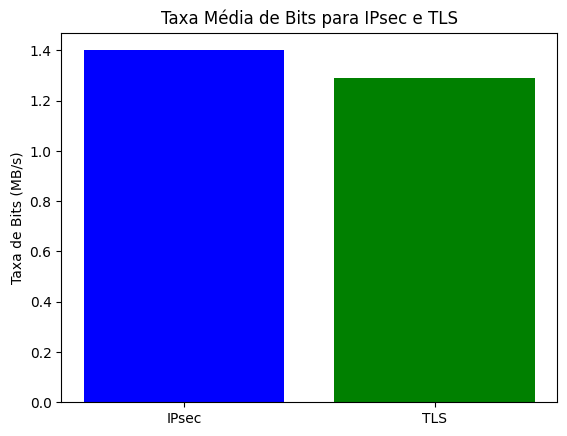

In [ ]:
taxas_bits = [taxaBitsIpsec, taxaBitsTls]
protocolos_bits = ['IPsec', 'TLS']

plt.bar(protocolos_bits, taxas_bits, color=['blue', 'green'])
plt.title('Taxa Média de Bits para IPsec e TLS')
plt.ylabel('Taxa de Bits (MB/s)')
plt.show()

# Perda de Pacotes por Túnel.

IPsec

In [ ]:
pacotesPerdidosIpsec = df_ipsec['Retr'].sum()
print(f"IPsec: {pacotesPerdidosIpsec}")

IPsec: 234


TLS

In [ ]:
pacotesPerdidosTls = df_tls['Retr'].sum()
print(f"TLS: {pacotesPerdidosTls}")

TLS: 391


Gráficos

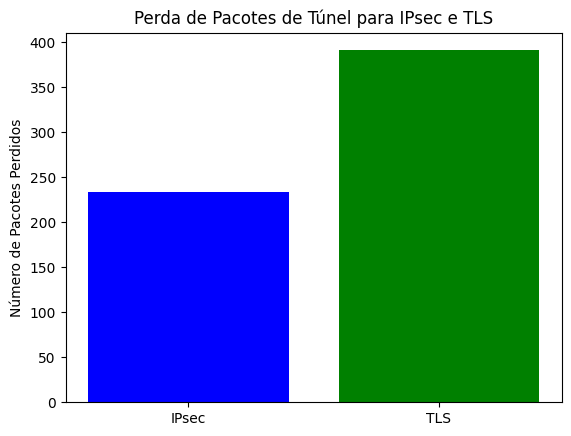

In [ ]:
pacotes_perdidos = [pacotesPerdidosIpsec, pacotesPerdidosTls]
protocolos_perda_pacotes = ['IPsec', 'TLS']

plt.bar(protocolos_perda_pacotes, pacotes_perdidos, color=['blue', 'green'])
plt.title('Perda de Pacotes de Túnel para IPsec e TLS')
plt.ylabel('Número de Pacotes Perdidos')
plt.show()

# Taxa de Erros.

IPsec


In [ ]:
pacotesEnviadosIpsec = (tranferenciaTotalIpsec / 0.128)
retransmissoes = df_ipsec['Retr'].sum()
taxaPerdaPacotesIpsec = (retransmissoes / pacotesEnviadosIpsec) * 100
print(f"IPsec: {round(taxaPerdaPacotesIpsec,2)}%")

TLS

In [ ]:
pacotesEnviadosTls = (tranferenciaTotalTls / 0.128)
retransmissoes = df_tls['Retr'].sum()
taxaPerdaPacotesTls = (retransmissoes / pacotesEnviadosTls) * 100
print(f"TLS: {round(taxaPerdaPacotesTls,2)}%")

Gráficos

In [ ]:
taxa_erros = [taxaPerdaPacotesIpsec, taxaPerdaPacotesTls]
retransmissoes = [100 - taxaPerdaPacotesIpsec, 100 - taxaPerdaPacotesTls]  # O complemento para 100%
protocolos_taxa_erros = ['IPsec', 'TLS']

plt.bar(protocolos_taxa_erros, taxa_erros, color='red', label='Taxa de Erros')
plt.bar(protocolos_taxa_erros, retransmissoes, bottom=taxa_erros, color='blue', label='Retransmissões')

plt.title('Taxa de Erros e Retransmissões para IPsec e TLS')
plt.ylabel('Porcentagem')
plt.legend()
plt.show()

# Variações IPsec.



IPsec

Bitrate

In [ ]:
variacaoBitrateIpsec = df_ipsec['Bitrate(MB)'].diff()

Gráficos

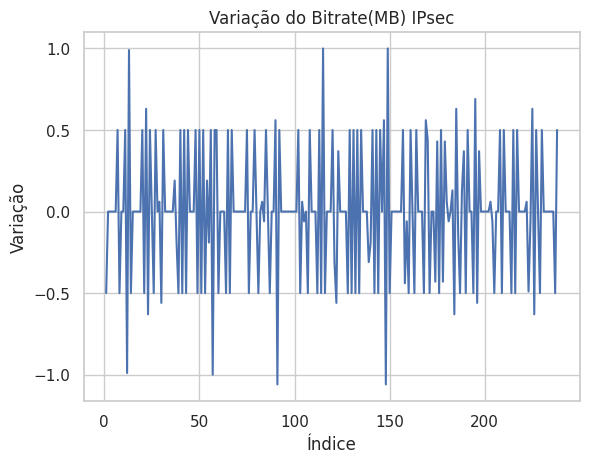

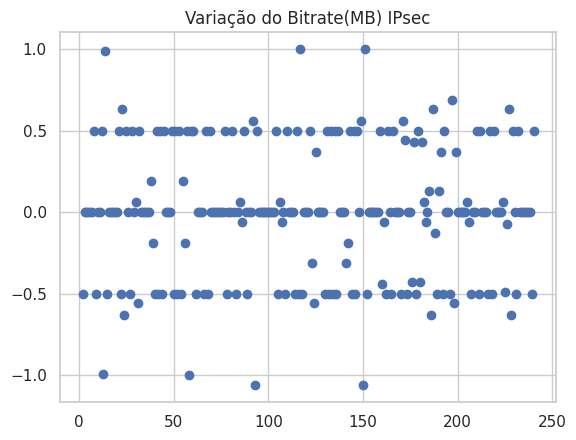

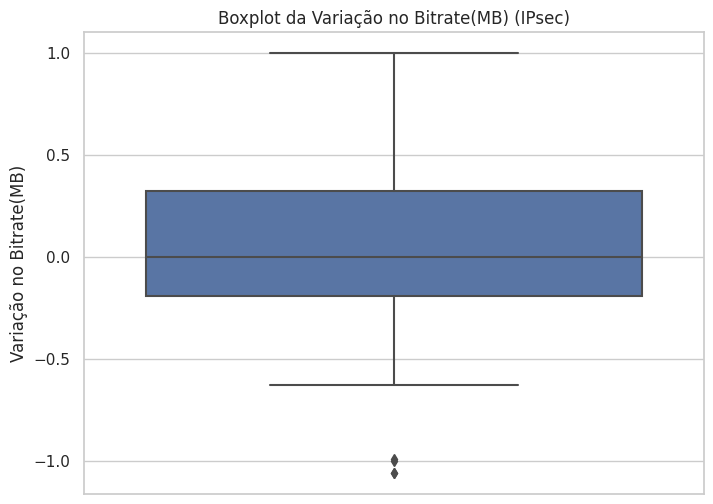

In [ ]:
# Gráfico de linha
variacaoBitrateIpsec = df_ipsec['Bitrate(MB)'].diff()
plt.plot(variacaoBitrateIpsec)
plt.title('Variação do Bitrate(MB) IPsec')
plt.xlabel('Índice')
plt.ylabel('Variação')
plt.show()

# Gráfico de dispersão
plt.title("Variação do Bitrate(MB) IPsec")
plt.scatter(df_ipsec['Interval'], variacaoBitrateIpsec)
df_ipsec['variacaoBitrateIPsec'] = variacaoBitrateIpsec  # Corrigindo o nome da coluna
plt.show()

# Gráfico boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y='variacaoBitrateIPsec', data=df_ipsec)  # Corrigindo o nome da coluna
ax.set_title('Boxplot da Variação no Bitrate(MB) (IPsec)')
ax.set_ylabel('Variação no Bitrate(MB)')

plt.show()

Tansfer

In [ ]:
variacaoTransferIpsec = df_ipsec['Transfer(MB)'].diff()

Gráficos

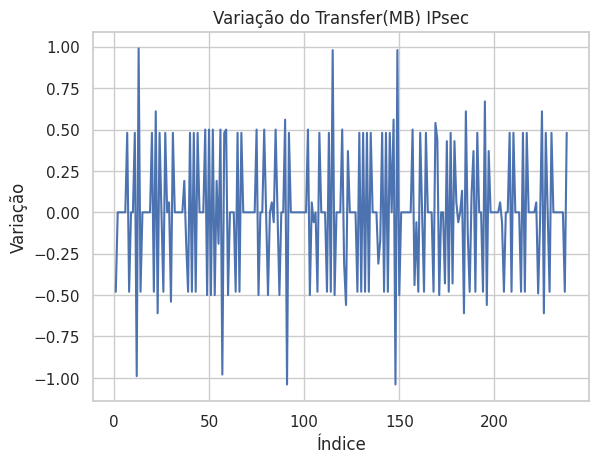

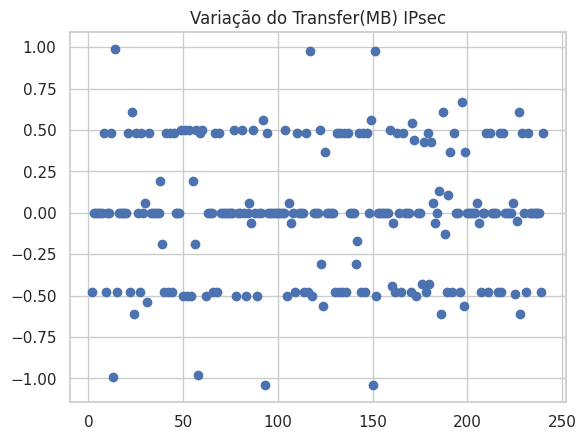

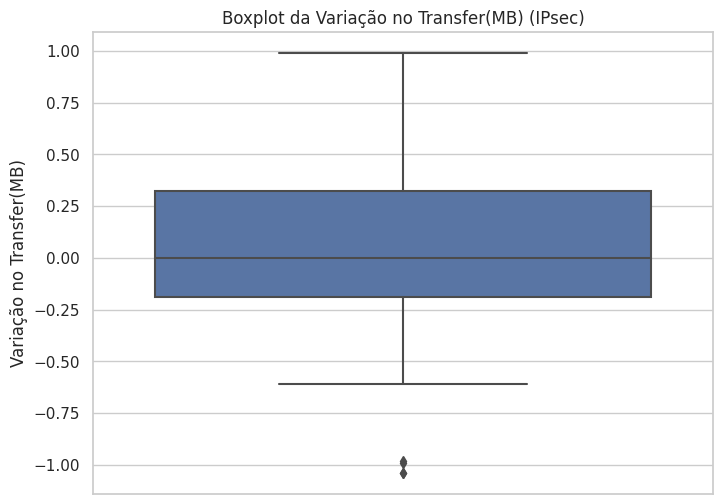

In [ ]:
# Gráfico de linha
variacaoTransferIpsec = df_ipsec['Transfer(MB)'].diff()
plt.plot(variacaoTransferIpsec)
plt.title('Variação do Transfer(MB) IPsec')
plt.xlabel('Índice')
plt.ylabel('Variação')
plt.show()

# Gráfico de dispersão
plt.title("Variação do Transfer(MB) IPsec")
plt.scatter(df_ipsec['Interval'], variacaoTransferIpsec)
df_ipsec['variacaoTransferIPsec'] = variacaoTransferIpsec  # Corrigindo o nome da coluna
plt.show()

# Gráfico boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y='variacaoTransferIPsec', data=df_ipsec)  # Corrigindo o nome da coluna
ax.set_title('Boxplot da Variação no Transfer(MB) (IPsec)')
ax.set_ylabel('Variação no Transfer(MB)')

plt.show()

# Variações TLS.



TLS

Bitrate

In [ ]:
variacaoBitrateTls = df_tls['Bitrate(MB)'].diff()

Gráficos

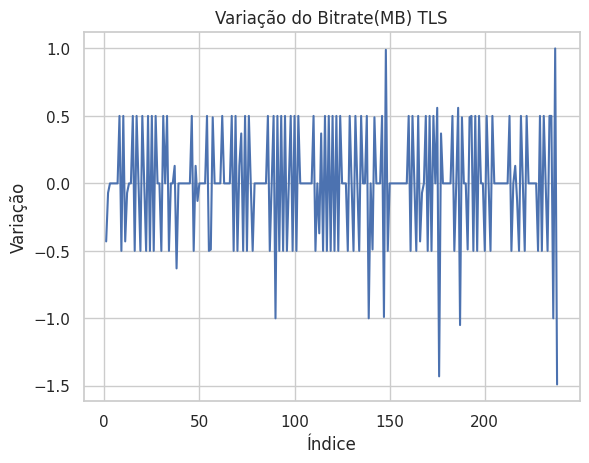

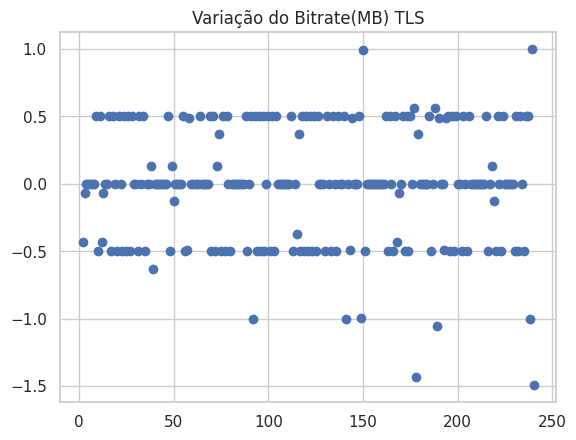

Text(0, 0.5, 'Variação no Bitrate(MB)')

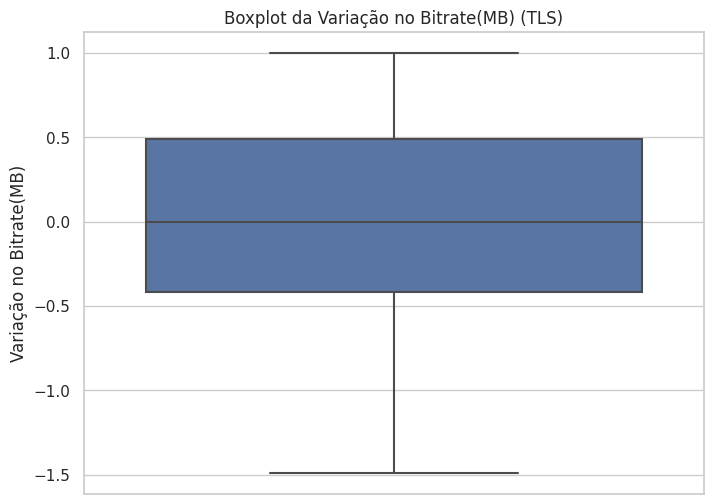

In [ ]:
# Gráfico de Linhas
plt.plot(variacaoBitrateTls)
plt.title('Variação do Bitrate(MB) TLS')
plt.xlabel('Índice')
plt.ylabel('Variação')
plt.show()

# Gráfico de Dispersão
plt.title("Variação do Bitrate(MB) TLS")
plt.scatter(df_ipsec['Interval'], variacaoBitrateTls)
df_tls['VariacaoBitrateTls'] = df_tls['Bitrate(MB)'].diff()
plt.show()

# Gráfico boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y='VariacaoBitrateTls', data=df_tls)
ax.set_title('Boxplot da Variação no Bitrate(MB) (TLS)')
ax.set_ylabel('Variação no Bitrate(MB)')


Transfer

In [ ]:
variacaoTransferTls = df_tls['Transfer(MB)'].diff()

Gráficos

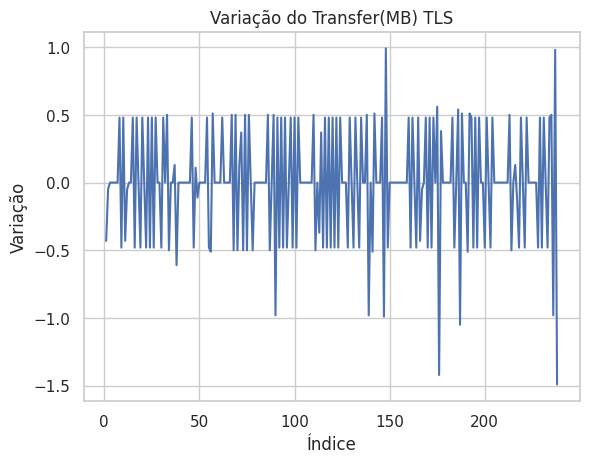

Text(0, 0.5, 'Variação no Transfer(MB)')

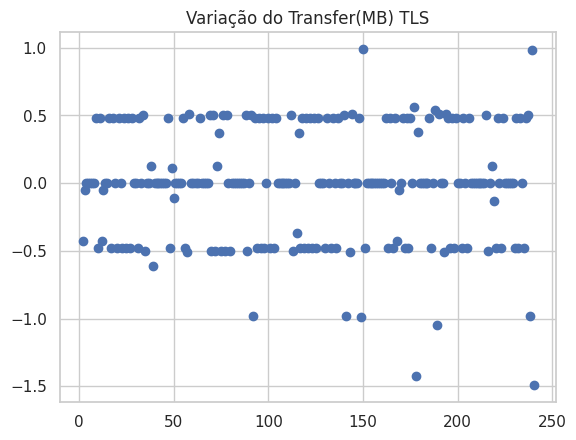

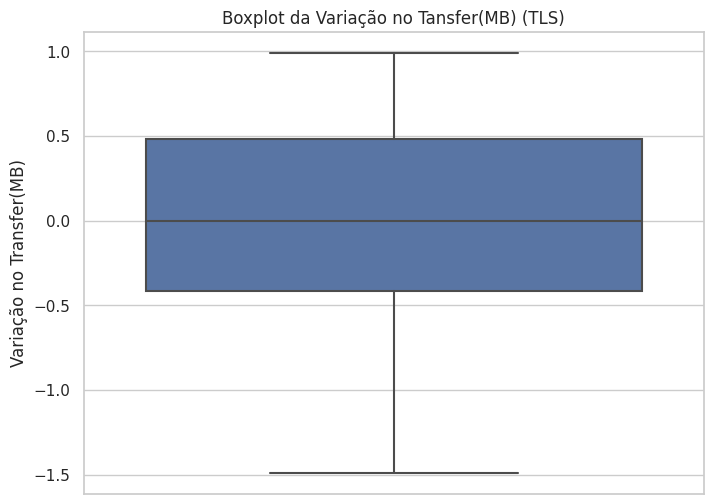

In [ ]:
# Gráfico de linhas.
plt.plot(variacaoTransferTls)
plt.title('Variação do Transfer(MB) TLS')
plt.xlabel('Índice')
plt.ylabel('Variação')
plt.show()

# Gráfico de dispersão.
plt.title("Variação do Transfer(MB) TLS")
plt.scatter(df_ipsec['Interval'], variacaoTransferTls)
df_tls['VariacaoTransferTls'] = df_tls['Transfer(MB)'].diff()

# Gráfico de boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y='VariacaoTransferTls', data=df_tls)
ax.set_title('Boxplot da Variação no Tansfer(MB) (TLS)')
ax.set_ylabel('Variação no Transfer(MB)')

# Janelas de congestionamento.

IPsec

Gráficos

In [ ]:
# Janela de congestionamento
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(df_ipsec['Interval'], df_ipsec['Cwnd(KB)'], label='Janela de Congestionamento')
plt.title('Variação da Janela de Congestionamento ao Longo do Tempo (KB)')
plt.xlabel('Tempo')
plt.ylabel('Janela de Congestionamento (KB)')
plt.legend()

# Taxa de transferência
plt.subplot(3, 1, 2)
plt.plot(df_ipsec['Interval'], df_ipsec['Transfer(MB)'], label='Taxa de Transferência')
plt.title('Variação da Taxa de Transferência ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Taxa de Transferência (MB)')
plt.legend()

# Taxa de bits
plt.subplot(3, 1, 3)
plt.plot(df_ipsec['Interval'], df_ipsec['Bitrate(MB)'], label='Taxa de Bits')
plt.title('Variação da Taxa de Bits ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Taxa de Bits (MB)')
plt.legend()

plt.tight_layout()
plt.show()

TLS

Gráficos

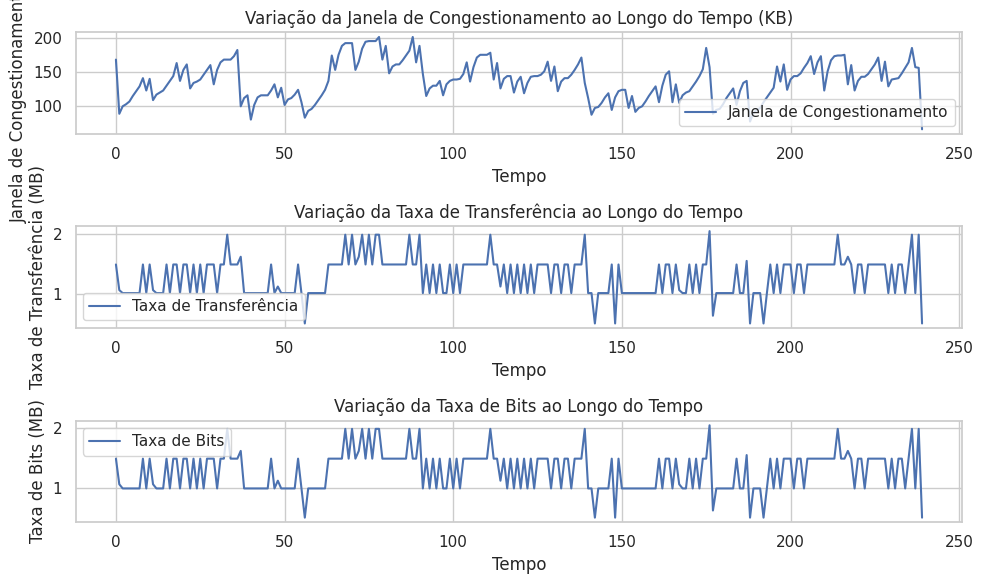

In [ ]:
# Janela de congestionamento
time = 240
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(df_tls['Interval'], df_tls['Cwnd(KB)'], label='Janela de Congestionamento')
plt.title('Variação da Janela de Congestionamento ao Longo do Tempo (KB)')
plt.xlabel('Tempo')
plt.ylabel('Janela de Congestionamento (KB)')
plt.legend()

# Taxa de transferência
plt.subplot(3, 1, 2)
plt.plot(df_tls['Interval'], df_tls['Transfer(MB)'], label='Taxa de Transferência')
plt.title('Variação da Taxa de Transferência ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Taxa de Transferência (MB)')
plt.legend()

# Taxa de bits
plt.subplot(3, 1, 3)
plt.plot(df_tls['Interval'], df_tls['Bitrate(MB)'], label='Taxa de Bits')
plt.title('Variação da Taxa de Bits ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Taxa de Bits (MB)')
plt.legend()

plt.tight_layout()
plt.show()